In [72]:
import cv2 
import numpy as np
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# data cleaning
def data_elim (image, label, L, newpath, img):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    if (np.where(hist == max(hist))[0][0] != 0) :
        cv2.imwrite(f'{newpath}/{label}_____{img}', image)
    else :
        if(max(hist)/(image.shape[0]*image.shape[1])<0.7):
            cv2.imwrite(f'{newpath}/{label}_____{img}', image)
        else:
            L.append(label)

def data_clean(old_path, new_path, data_elim, datacleaned):
    for root, dir, images in os.walk(old_path):
        for img in images:
            if ((img.endswith('jpg')) or (img.endswith('bmp')) or (img.endswith('png'))) and (not((img.endswith('(1).jpg')) or (img.endswith('(1)).bmp'))or (img.endswith('(1)).png')))) :       
                path= os.path.join(root, img)
                label = img[:5]
                imag = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

                if len(imag) != 0 :
                    imag= cv2.resize(imag, (128,128) , interpolation = cv2.INTER_AREA)
                    data_elim(imag,label , datacleaned, new_path, img)
    return datacleaned

In [69]:
# suite ta3 cleaning bch brk nehi les class ki fihom 1 images brk

x = []
y = []
for root, dir, images in os.walk('data/cleaned/classunique'):
    for img in images:
        x.append(img)
        f=img[0:8]
        while(f.endswith('_')):
            f= f[:-1]
        y.append(f)

le = preprocessing.LabelEncoder()
z = list(le.fit_transform(y))
labels_dic= {k:v for k,v in zip(y,z)}
len(x)

6385

In [1]:
# np.unique(z, return_counts=True) 

In [73]:
d = [i for i,k in zip(x , z) if z.count(k)>1]

# z.count(1256)
print(len(d))

6385


In [47]:
# write the images brk f a new folder ga3 
for root, dir, images in os.walk('cleaned'):
    for img in images:
        if img in d :       
            path= os.path.join(root, img)
            image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            cv2.imwrite(f'cleaned/classunique/{img}', image)

v=[]
for root, dir, images in os.walk('cleaned/classunique'):
    for img in images:
        v.append(img)
len(v)

c:\Users\21379\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

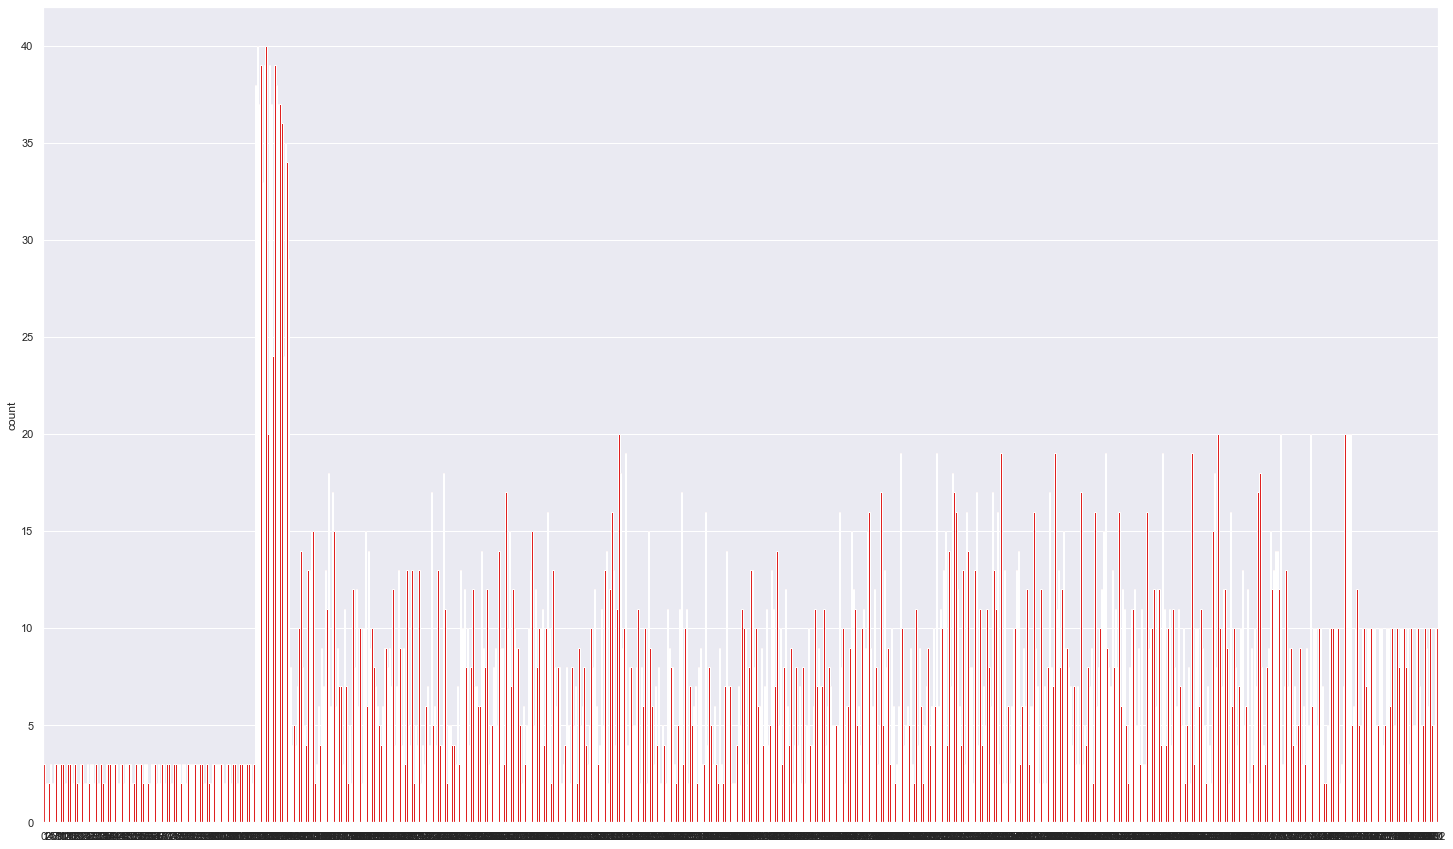

In [77]:
# sns.figure(figsize = (25,25))
sns.set(rc={'figure.figsize':(25,15)})
sns.countplot(z, color='red')

In [15]:
# pour voir brk les classes ta3 casia 800 hadi psk jawni bizarre kifihom 40 hsbali ghelto alors que non

casia800 = []
for root, dir, images in os.walk('cleaned/casia800'):
    for img in images:
        casia800.append(img[0:5])
casia800 = np.array(casia800)
np.unique(casia800, return_counts=True)   
# plt.hist(casia800)

(array(['S2001', 'S2002', 'S2003', 'S2004', 'S2005', 'S2006', 'S2007',
        'S2008', 'S2009', 'S2010', 'S2011', 'S2012', 'S2013', 'S2014',
        'S2015', 'S2016', 'S2017', 'S2018', 'S2019', 'S2020', 'S3001'],
       dtype='<U5'),
 array([38, 40, 37, 39, 33, 39, 40, 20, 39, 37, 24, 39, 38, 37, 37, 36, 24,
        35, 34, 29,  8], dtype=int64))

In [63]:
f , n = np.unique(y, return_counts=True) 
# plt.figure(figsize=(25,25)) 
# plt.plot(f,n)
# plt.show()

print('nbr de class est :' , f.argmax())    # pour confirmer le nombre de class
print('l index de la class ayant un max nbr d images ' ,n.argmax())    # pour avoir le nombre d'images max dans une class
print( 'max nbr of images/class', max(n))
r = np.where(n == max(n))[0]

for i in range(len(r)):
    print([k for (k,v) in labels_dic.items() if v == r[i]])
# c pour chercher la/les classe(s) (le nom de la classe) ayant le plus grand nombre d images


nbr de class est : 2007
l index de la class ayant un max nbr d images  1249
max nbr of images/class 40
['S2002']
['S2007']
